Utilizando el dataset de evolución del impacto de Covid-19 a nivel global disponible en https://github.com/datasets/covid-19 realiza:

1. Análisis inicial de los datos (cantidad de filas, países, atributos, fechas)
2. Análisis descriptivo de la base de datos
3. Identifica al menos 2 patrones o tendencias en los datos.
4. Mapa mundial con datos de tu elección por país.
5. Visualizaciones que sustenten el análisis.


---
### Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

---
### Se carga el dataset

In [2]:
df = pd.read_csv('countries-aggregated.csv')

---
### Análisis inicial de los datos

In [3]:
print('Filas:', df.shape[0])
print('Columnas:', df.shape[1])
print('Nombres de columnas:', df.columns.tolist())
print('Países únicos:', df['Country'].nunique())
print('Países:', df['Country'].unique())
print('Rango de fechas:', df['Date'].min(), 'a', df['Date'].max())
print('Primeras 5 filas del dataset:')
print(df.head())

Filas: 161568
Columnas: 5
Nombres de columnas: ['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths']
Países únicos: 198
Países: ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Antarctica'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 

---
### Análisis descriptivo

In [4]:
#Estadísticas descriptivas sobre el dataframe
print('Estadísticas descriptivas generales:\n')
print(df.describe())

#Evaluando la existencia de valores nulos
print('\nValores nulos en cada columna:\n')
print(df.isnull().sum())

#Una análisis sobre la correlación entre las variables
print('\nCorrelación entre las variables:\n')
print(df.corr(numeric_only=True))
print('\n Se puede identificar una correlación fuerte positiva entre las variables Confirmados y Fallecimientos.')

#Casos confirmados por país
print('\nCasos confirmados por país:\n')
confirmados_por_pais = df.groupby('Country')['Confirmed'].max().sort_values(ascending=False)
print(confirmados_por_pais)

#Fallecimientos por país
print('\nFallecimientos por país:\n')
muertes_por_pais = df.groupby('Country')['Deaths'].max().sort_values(ascending=False)
print(muertes_por_pais)


Estadísticas descriptivas generales:

          Confirmed     Recovered         Deaths
count  1.615680e+05  1.615680e+05  161568.000000
mean   7.361569e+05  1.453967e+05   13999.436089
std    3.578884e+06  9.748275e+05   59113.581271
min    0.000000e+00  0.000000e+00       0.000000
25%    1.220000e+03  0.000000e+00      17.000000
50%    2.369200e+04  1.260000e+02     365.000000
75%    2.558420e+05  1.797225e+04    4509.000000
max    8.062512e+07  3.097475e+07  988609.000000

Valores nulos en cada columna:

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

Correlación entre las variables:

           Confirmed  Recovered    Deaths
Confirmed   1.000000   0.277797  0.914993
Recovered   0.277797   1.000000  0.318160
Deaths      0.914993   0.318160  1.000000

 Se puede identificar una correlación fuerte positiva entre las variables Confirmados y Fallecimientos.

Casos confirmados por país:

Country
US                  80625120
India               43042

---
### Patrones de tendencia

#### Tendencia temporal de casos confirmados y fallecimientos a nivel mundial


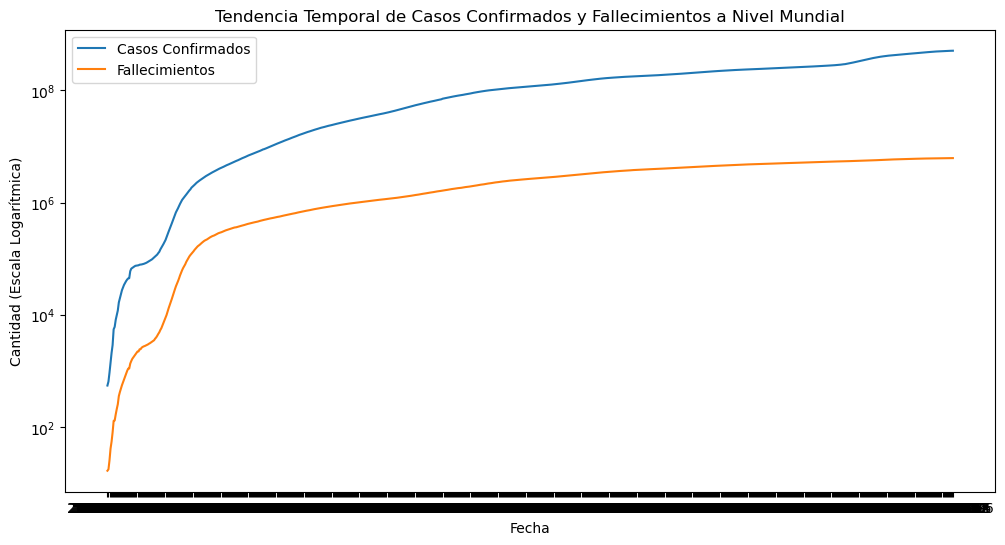

In [5]:
#Agrupamos los datos utilizando la columna 'Date'
agrupar_df = df.groupby('Date')

#Sumanos los casos de confirmados y fallecimientos
suma_df = agrupar_df.agg({'Confirmed': 'sum', 'Deaths': 'sum'})

#Reiniciar el índice
tendencia_global = suma_df.reset_index()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

#Graficar
ax.plot(tendencia_global['Date'], tendencia_global['Confirmed'], label='Casos Confirmados')
ax.plot(tendencia_global['Date'], tendencia_global['Deaths'], label='Fallecimientos')

#Escala logarítmica para el eje Y y resaltar tendencia/patrones
ax.set_yscale("log")

#Etiquetas
ax.set_title('Tendencia Temporal de Casos Confirmados y Fallecimientos a Nivel Mundial')
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad (Escala Logarítmica)')
ax.legend()

plt.show()


#### Países con mayor aumento de casos en el último mes

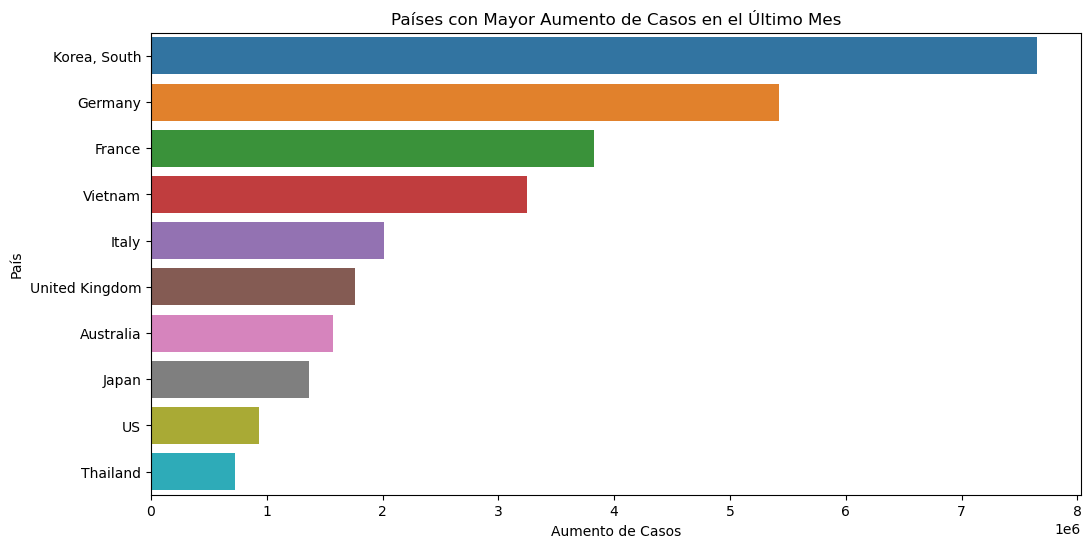

In [6]:
#Se ajusta el tipo de dato de 'Date' de string a formato fecha
df['Date_'] = pd.to_datetime(df['Date'])

#Se filtran los datos para solo el último mes
ultimo_mes = df[df['Date_'] >= df['Date_'].max() - pd.DateOffset(days=30)]

#se agrupa por pais y se obtiene el mínimo y máximo para Confirmados
aumento_ultimo_mes = ultimo_mes.groupby('Country').agg({'Confirmed': ['min', 'max']}).reset_index()

# Renombrar las columnas para facilitar el manejo
aumento_ultimo_mes.columns = ['Country', 'Confirmados_Min', 'Confirmados_Max']

#calcula el aumento de casos en el periodo
aumento_ultimo_mes['Aumento'] = aumento_ultimo_mes['Confirmados_Max'] - aumento_ultimo_mes['Confirmados_Min']

#Se ordena para buscar los 10 con mayor aumento de casos confirmados
paises_mayor_aumento = aumento_ultimo_mes.sort_values('Aumento', ascending=False).head(10)

#Visualizar los 10 países con el mayor aumento de casos en el último mes
plt.figure(figsize=(12, 6))
sns.barplot(x='Aumento', y='Country', data=paises_mayor_aumento)
plt.title('Países con Mayor Aumento de Casos en el Último Mes')
plt.xlabel('Aumento de Casos')
plt.ylabel('País')
plt.show()


---
### Mapa mundial

/var/folders/rn/0xw3kvws3835x04f9_hby75w0000gn/T/ipykernel_34933/2080930441.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  mapa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


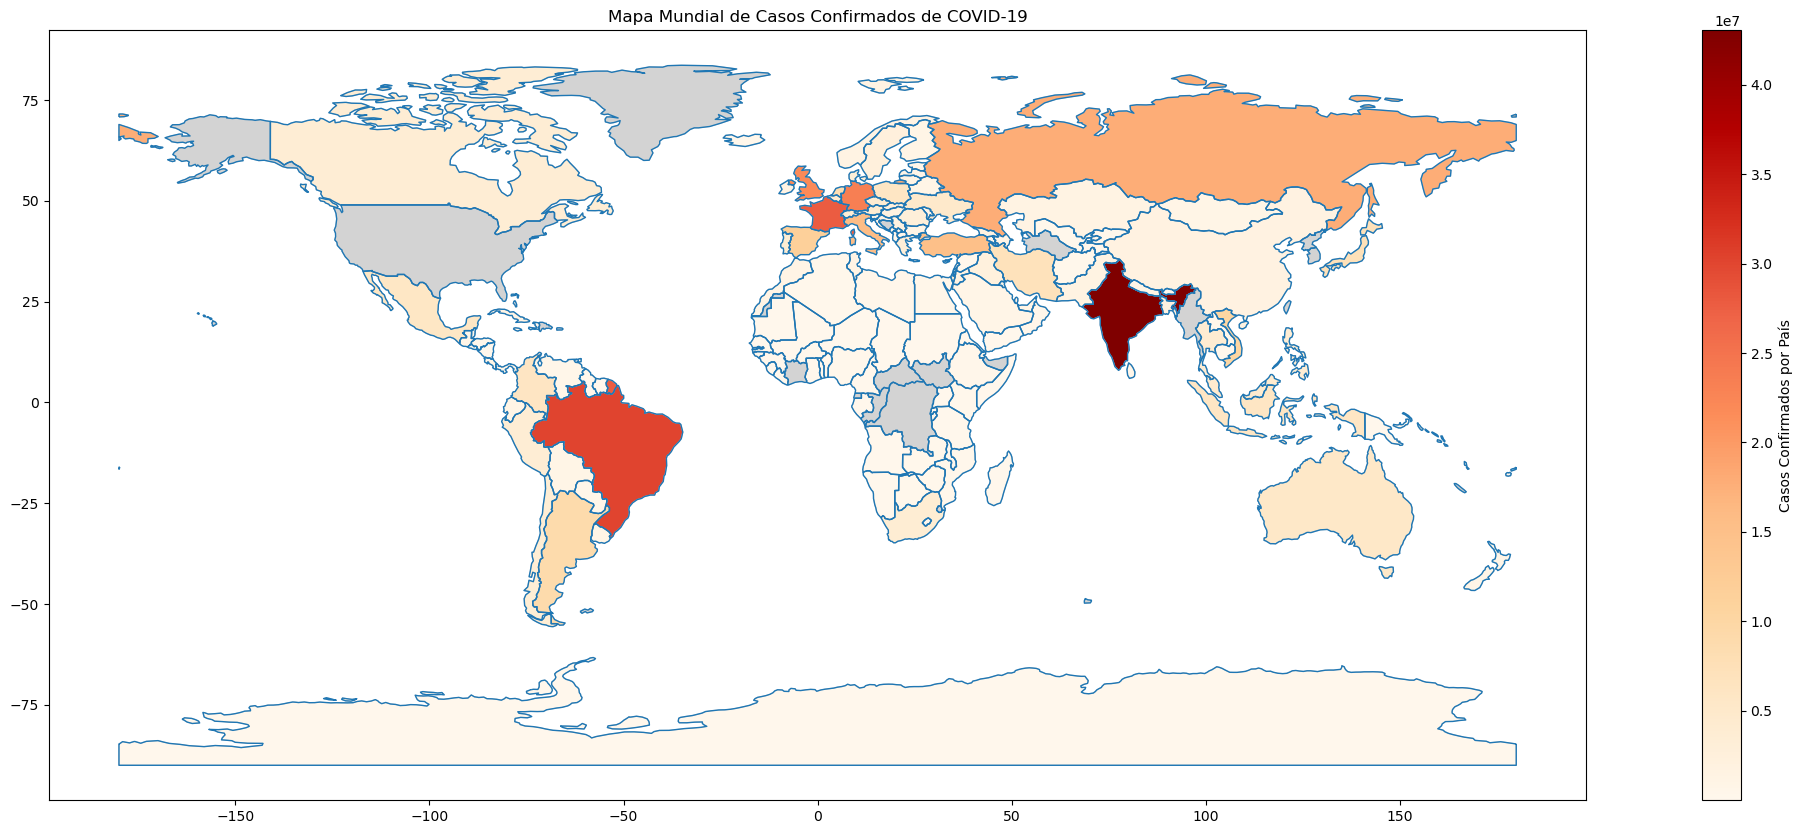

In [7]:
#Mapa con casos confirmados por país

#Carga de mapa
mapa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Preparando los datos para el mapa
ultimos_datos = df[df['Date'] == df['Date'].max()]
mapa_datos = mapa.merge(ultimos_datos, how='left', left_on='name', right_on='Country')

# Creando el mapa
fig, ax = plt.subplots(1, figsize=(30, 10))
mapa_datos.boundary.plot(ax=ax, linewidth=1)
mapa_datos.plot(column='Confirmed', ax=ax, legend=True,
              legend_kwds={'label': 'Casos Confirmados por País'},
              cmap='OrRd', linewidth=0.8, edgecolor='0.8', missing_kwds={'color': 'lightgrey'})
plt.title('Mapa Mundial de Casos Confirmados de COVID-19')
plt.show()